In [1]:
#Add Matplotlib inline magic command
%matplotlib inline

#dependencies and set up
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#files to load
city_data_to_load ="Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"


In [3]:
#read the city data file and store it in a pandas DataFrame.
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [4]:
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


In [5]:
#get the columns and rows that are not null
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [6]:
#getthe columns and the rows that are not null
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [7]:
#get the data types for each column
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [8]:
#get the unique values of the type of city
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [9]:
#Get the number of data points from the Urban cities
sum(city_data_df["type"] =="Rural")

18

In [10]:
#ride data inspection. Get he colunms and rows that are not null
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [11]:
#make sure there are no null values
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [12]:
#make sure that the correct columns are the numerical data type
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [13]:
#combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how = "left", on=["city", "city"])

#display the dataframe
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [14]:
#create the urban cities dataframe
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
urban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [15]:
#create the suburban and rural city dataframes
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
rural_cities_df = pyber_data_df[pyber_data_df["type"] =="Rural"]
rural_cities_df

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [16]:
#get the number of rides for urban cities
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
urban_ride_count.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [17]:
#create the suburban and rural # of rides
suburban_ride_count= suburban_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]


In [18]:
#get the average fare for each city in the urban cities.
urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
urban_avg_fare.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [19]:
#get the average fare for each city in suburban and rural cities
suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare.head()

city
Bradshawfurt      40.064000
Garzaport         24.123333
Harringtonfort    33.470000
Jessicaport       36.013333
Lake Jamie        34.358333
Name: fare, dtype: float64

In [20]:
#find the average number of drivers for each urban city
urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]
urban_driver_count

city
Amandaburgh            12.0
Barajasview            26.0
Carriemouth            52.0
Christopherfurt        41.0
Deanville              49.0
                       ... 
West Patrickchester    25.0
West Robert            39.0
West Samuelburgh       73.0
Williamsstad           59.0
Williamsview           46.0
Name: driver_count, Length: 66, dtype: float64

In [21]:
#get the average number of drivers for each suburban and rural city
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]


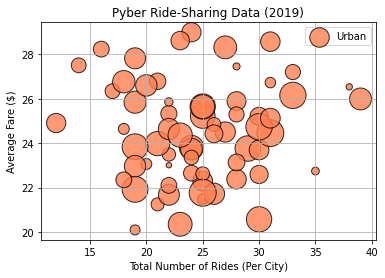

In [22]:
#build the scatter plots for urban cities.
plt.scatter(urban_ride_count, urban_avg_fare,
           s=10*urban_driver_count, c="coral", alpha=0.8, edgecolor="black", linewidths=1,
           label="Urban")
plt.title("Pyber Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
plt.legend()


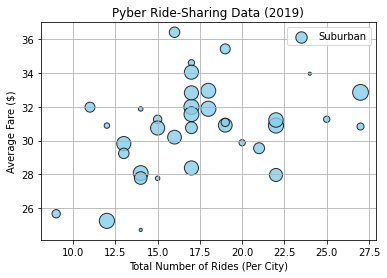

In [23]:
#build the scatter plots for suburban cities
plt.scatter(suburban_ride_count, suburban_avg_fare,
           s=10*suburban_driver_count, c="skyblue", alpha=0.8, edgecolor="black", linewidths=1,
           label="Suburban")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.title("Pyber Ride-Sharing Data (2019)")
plt.legend()
plt.grid(True)

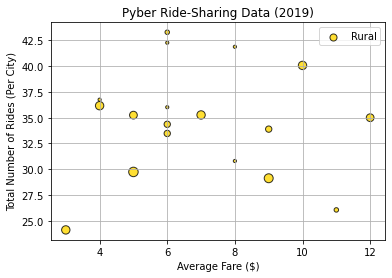

In [24]:
#build the rural cities scatter plot
plt.scatter(rural_ride_count, rural_avg_fare, 
           s=10*rural_driver_count, c="gold", alpha=0.8, edgecolor="black", linewidths=1,
           label="Rural")
plt.ylabel("Total Number of Rides (Per City)")
plt.xlabel("Average Fare ($)")
plt.title("Pyber Ride-Sharing Data (2019)")
plt.legend()
plt.grid(True)

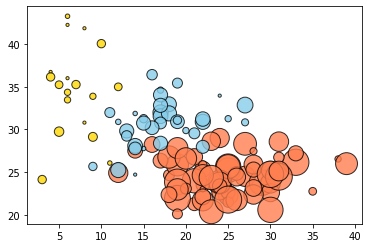

In [25]:
#Add the scatter charts for each type of city
plt.scatter(urban_ride_count, urban_avg_fare,
           s=10*urban_driver_count, c="coral", alpha=0.8, edgecolor="black", linewidths=1,
           label="Urban")


plt.scatter(suburban_ride_count, suburban_avg_fare,
           s=10*suburban_driver_count, c="skyblue", alpha=0.8, edgecolor="black", linewidths=1,
           label="Suburban")


plt.scatter(rural_ride_count, rural_avg_fare, 
           s=10*rural_driver_count, c="gold", alpha=0.8, edgecolor="black", linewidths=1,
           label="Rural")
#show the plot
plt.show()

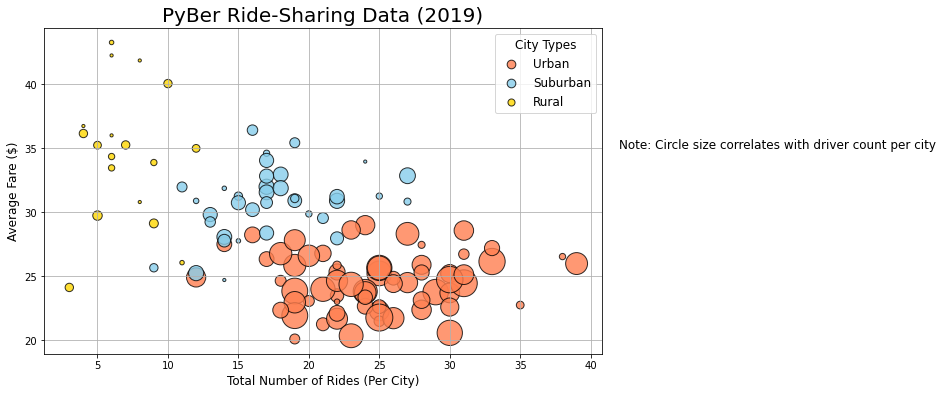

In [26]:
#format the scatter plots
plt.subplots(figsize=(10,6))
plt.scatter(urban_ride_count, urban_avg_fare,
           s=10*urban_driver_count, c="coral", alpha=0.8, edgecolor="black", linewidths=1,
           label="Urban")


plt.scatter(suburban_ride_count, suburban_avg_fare,
           s=10*suburban_driver_count, c="skyblue", alpha=0.8, edgecolor="black", linewidths=1,
           label="Suburban")


plt.scatter(rural_ride_count, rural_avg_fare, 
           s=10*rural_driver_count, c="gold", alpha=0.8, edgecolor="black", linewidths=1,
           label="Rural")

#incorporate the other properties
plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.grid(True)

#create a legend
lgnd =plt.legend(fontsize="12", mode= "Expanded", scatterpoints=1,
                 loc="best", title="City Types")
lgnd.legendHandles[0]._sizes =[75]
lgnd.legendHandles[1]._sizes=[75]
lgnd.legendHandles[2].sizes=[75]
lgnd.get_title().set_fontsize(12)

#incorporate a text label about the circle size
plt.text(42,35, "Note: Circle size correlates with driver count per city", fontsize=12)

plt.savefig("analysis/fig1.png")
#show the plot
plt.show()

In [27]:
#get summary statistics
urban_cities_df.describe()

,fare,ride_id,driver_count
count,1625.000000,1.625000e+03,1625.000000
mean,24.525772,4.873485e+12,36.678154
std,11.738649,2.907440e+12,20.075545
min,4.050000,1.458810e+10,3.000000
25%,14.550000,2.400244e+12,22.000000
50%,24.640000,4.711188e+12,37.000000
75%,34.580000,7.451579e+12,52.000000
max,44.970000,9.991538e+12,73.000000


In [28]:
suburban_cities_df.describe()

,fare,ride_id,driver_count
count,625.000000,6.250000e+02,625.000000
mean,30.970128,4.971015e+12,13.712000
std,10.677508,2.912410e+12,8.042372
min,12.050000,3.218337e+08,1.000000
25%,21.970000,2.364253e+12,5.000000
50%,30.750000,5.053221e+12,16.000000
75%,39.830000,7.551674e+12,21.000000
max,49.960000,9.917744e+12,25.000000


In [29]:
rural_cities_df.describe()

,fare,ride_id,driver_count
count,125.000000,1.250000e+02,125.000000
mean,34.623440,4.647746e+12,4.296000
std,14.558046,2.887834e+12,2.691156
min,10.110000,2.684873e+10,1.000000
25%,19.900000,2.275364e+12,1.000000
50%,37.050000,4.023962e+12,4.000000
75%,47.070000,7.118047e+12,7.000000
max,58.550000,9.990581e+12,9.000000


In [30]:
#ride summary statistics
urban_ride_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

In [31]:
suburban_ride_count.describe()

count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

In [32]:
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [33]:
#calculate the mean of the ride count for each city type.
round(urban_ride_count.mean(),2), round(suburban_ride_count.mean(),2), round(rural_ride_count.mean(),2)

(24.62, 17.36, 6.94)

In [34]:
round(urban_ride_count.median(),2)

24.0

In [35]:
#calculate the mode of the ride count for the urban cities
urban_ride_count.mode()

0    22
1    25
dtype: int64

In [36]:
suburban_ride_count.mode()

0    17
dtype: int64

In [37]:
#import numpy and the stats module from sciPy
import numpy as np
import scipy.stats as sts

In [38]:
#calculate the measures of central tendency for the ride count for the urban cities
mean_urban_ride_count = np.mean(urban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.")
      
median_urban_ride_count=np.median(urban_ride_count)
print(f"The median for the ride counts for urban trips is {median_urban_ride_count}.")

mode_urban_ride_count=sts.mode(urban_ride_count)
print(f"The mod of the ride counts for urban trips is {mode_urban_ride_count}.")

The mean for the ride counts for urban trips is 24.62.
The median for the ride counts for urban trips is 24.0.
The mod of the ride counts for urban trips is ModeResult(mode=array([22]), count=array([7])).


In [39]:
#calculate the measures of central tendency for the ride count for the suburban cities
mean_suburban_ride_count = np.mean(suburban_ride_count)
print(f"The mean for the ride counts for suburban trips is {mean_suburban_ride_count:.2f}.")
      
median_suburban_ride_count=np.median(suburban_ride_count)
print(f"The median for the ride counts for suburban trips is {median_suburban_ride_count}.")

mode_suburban_ride_count=sts.mode(suburban_ride_count)
print(f"The mod of the ride counts for suburban trips is {mode_suburban_ride_count}.")

The mean for the ride counts for suburban trips is 17.36.
The median for the ride counts for suburban trips is 17.0.
The mod of the ride counts for suburban trips is ModeResult(mode=array([17]), count=array([7])).


In [40]:
mode_rural_ride_count=sts.mode(rural_ride_count)
print(f"The mod of the ride counts for rural trips is {mode_rural_ride_count}.")

The mod of the ride counts for rural trips is ModeResult(mode=array([6]), count=array([5])).


In [41]:
#get the fares for teh urban cities
urban_fares = urban_cities_df["fare"]
urban_fares.head()

0    13.83
1    30.24
2    33.44
3    23.44
4    34.58
Name: fare, dtype: float64

In [42]:
#calculate the measures of central tendency for the average fare for each urban city
mean_urban_fares = np.mean(urban_fares)
print(f"The mean fare price for urban trips is ${mean_urban_fares:.2f}.")

median_urban_fares =np.median(urban_fares)
print(f"The median fare price for urban trips is ${median_urban_fares:.2f}.")

mode_urban_fares = sts.mode(urban_fares)
print(f"The mode fare price for urban trips is {mode_urban_fares}.")

The mean fare price for urban trips is $24.53.
The median fare price for urban trips is $24.64.
The mode fare price for urban trips is ModeResult(mode=array([22.86]), count=array([5])).


In [43]:
suburban_fares=suburban_cities_df["fare"]
rural_fares = rural_cities_df["fare"]
rural_fares.head()
suburban_fares.head()

1625    27.79
1626    18.75
1627    21.71
1628    17.10
1629    37.78
Name: fare, dtype: float64

In [44]:
#calculate the measures of central tendency for the average fare for each urban city
mean_suburban_fares = np.mean(suburban_fares)
print(f"The mean fare price for suburban trips is ${mean_suburban_fares:.2f}.")

median_suburban_fares =np.median(suburban_fares)
print(f"The median fare price for suburban trips is ${median_suburban_fares:.2f}.")

mode_suburban_fares = sts.mode(suburban_fares)
print(f"The mode fare price for suburban trips is {mode_suburban_fares}.")

The mean fare price for suburban trips is $30.97.
The median fare price for suburban trips is $30.75.
The mode fare price for suburban trips is ModeResult(mode=array([17.99]), count=array([3])).


In [45]:
#calculate the measures of central tendency for the average fare for each rural city
mean_rural_fares = np.mean(rural_fares)
print(f"The mean fare price for rural trips is ${mean_rural_fares:.2f}.")

median_rural_fares =np.median(rural_fares)
print(f"The median fare price for rural trips is ${median_rural_fares:.2f}.")

mode_rural_fares = sts.mode(rural_fares)
print(f"The mode fare price for rural trips is {mode_rural_fares}.")

The mean fare price for rural trips is $34.62.
The median fare price for rural trips is $37.05.
The mode fare price for rural trips is ModeResult(mode=array([37.05]), count=array([2])).


In [46]:
#Get the driver count from the 3 kinds of cities
urban_drivers = urban_cities_df["driver_count"]
suburban_drivers=suburban_cities_df["driver_count"]
rural_drivers = rural_cities_df["driver_count"]

In [47]:
#calculate the measures of central tendency for each count
mean_urban_drivers = np.mean(urban_drivers)
print(f"The mean number of drivers for urban cities is {mean_urban_drivers:.0f}.")

median_urban_drivers = np.median(urban_drivers)
print(f"The median number of drivers for urban cities is {median_urban_drivers:.0f}.")

mode_urban_drivers = sts.mode(urban_drivers)
print(f"The mode number of drivers for urban cities is {mode_urban_drivers}.")


The mean number of drivers for urban cities is 37.
The median number of drivers for urban cities is 37.
The mode number of drivers for urban cities is ModeResult(mode=array([39]), count=array([86])).


In [48]:
mean_suburban_drivers = np.mean(suburban_drivers)
print(f"The mean number of drivers for suburban cities is {mean_suburban_drivers:.0f}.")

median_suburban_drivers = np.median(suburban_drivers)
print(f"The median number of drivers for suburban cities is {median_urban_drivers:.0f}.")

mode_suburban_drivers = sts.mode(suburban_drivers)
print(f"The mode number of drivers for suburban cities is {mode_suburban_drivers}.")

The mean number of drivers for suburban cities is 14.
The median number of drivers for suburban cities is 37.
The mode number of drivers for suburban cities is ModeResult(mode=array([20]), count=array([79])).


In [49]:
mean_rural_drivers = np.mean(rural_drivers)
print(f"The mean number of drivers for rural cities is {mean_rural_drivers:.0f}.")

median_rural_drivers = np.median(rural_drivers)
print(f"The median number of drivers for rural cities is {median_rural_drivers:.0f}.")

mode_rural_drivers = sts.mode(rural_drivers)
print(f"The mode number of drivers for rural cities is {mode_rural_drivers}.")

The mean number of drivers for rural cities is 4.
The median number of drivers for rural cities is 4.
The mode number of drivers for rural cities is ModeResult(mode=array([1]), count=array([32])).


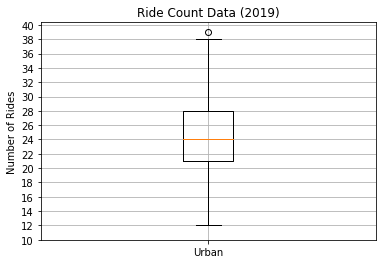

In [50]:
#create urban_ride_count box and whisker plot
#creat a box and whisker plot for the urban cities ride count
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_ride_count, labels = x_labels)
#add the title, yaxis label and grid
ax.set_title("Ride Count Data (2019)")
ax.set_ylabel("Number of Rides")
ax.set_yticks(np.arange(10,41, step=2.0))
ax.grid()
plt.show()

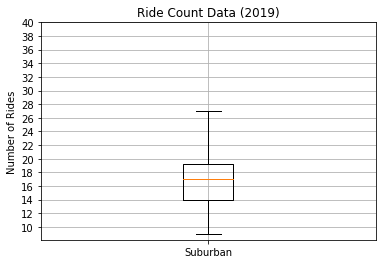

In [51]:
#create a box and whisker plot for suburban cities
x_labels =["Suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_ride_count, labels= x_labels)

#add the formatting
ax.set_title("Ride Count Data (2019)")
ax.set_ylabel("Number of Rides")
ax.set_yticks(np.arange(10,41, step = 2.0))
ax.grid()
plt.show()

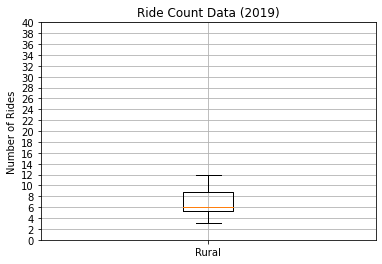

In [52]:
#create a box and whisker plot for rural cities
x_labels =["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_ride_count, labels= x_labels)

#add the formatting
ax.set_title("Ride Count Data (2019)")
ax.set_ylabel("Number of Rides")
ax.set_yticks(np.arange(0,41, step = 2.0))
ax.grid()
plt.show()

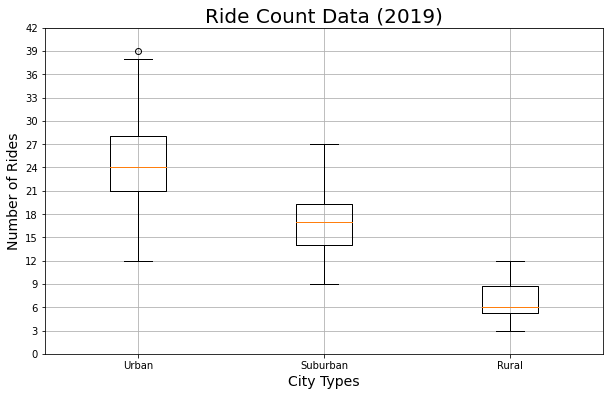

In [53]:
#Add all ride count box and whisker plots to the same graph
x_labels=["Urban", "Suburban", "Rural"]
ride_count_data=[urban_ride_count, suburban_ride_count, rural_ride_count]
fig, ax = plt.subplots(figsize=(10,6))
ax.set_title("Ride Count Data (2019)", fontsize=20)
ax.set_ylabel("Number of Rides", fontsize =14)
ax.set_xlabel("City Types", fontsize =14)
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_yticks(np.arange(0, 45, step=3.0))
ax.grid()
#save the figure
plt.savefig("analysis/fig2.png")
plt.show()

In [54]:
#get the urban city that has a ride count of 39(the outlier)
urban_city_outlier = urban_ride_count[urban_ride_count == 39].index[0]
print(f"{urban_city_outlier} has the highest rider count.")


West Angela has the highest rider count.


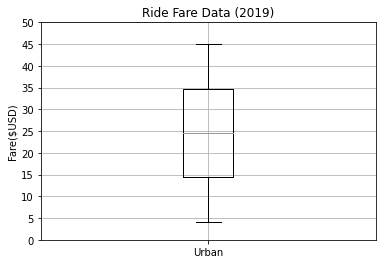

Summary Statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [55]:
#create a box and whisker plot fo he urban fare data
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_fares, labels=x_labels)

#add a title yaxis label and grid
ax.grid()
ax.set_ylabel("Fare($USD)")
ax.set_title("Ride Fare Data (2019)")
ax.set_yticks(np.arange(0,51, step=5.0))
plt.show()
print("Summary Statistics")
urban_fares.describe()

Summary Statistics


count    625.000000
mean      30.970128
std       10.677508
min       12.050000
25%       21.970000
50%       30.750000
75%       39.830000
max       49.960000
Name: fare, dtype: float64

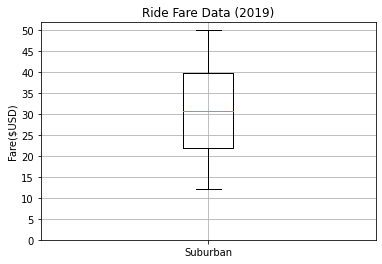

In [59]:
#create a box and whisker plot with statistics for suburban fares
x_labels=["Suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_fares, labels=x_labels)

#format
ax.set_title("Ride Fare Data (2019)")
ax.set_ylabel("Fare($USD)")
ax.set_yticks(np.arange(0,51, step=5.0))
ax.grid()
plt.show

print("Summary Statistics")
suburban_fares.describe()

Summary Statistics


count    125.000000
mean      34.623440
std       14.558046
min       10.110000
25%       19.900000
50%       37.050000
75%       47.070000
max       58.550000
Name: fare, dtype: float64

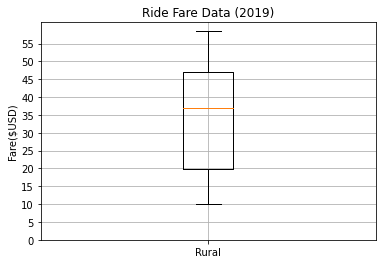

In [61]:
#create a box and whisker plot with statistics for suburban fares
x_labels=["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_fares, labels=x_labels)

#format
ax.set_title("Ride Fare Data (2019)")
ax.set_ylabel("Fare($USD)")
ax.set_yticks(np.arange(0,60, step=5.0))
ax.grid()
plt.show

print("Summary Statistics")
rural_fares.describe()

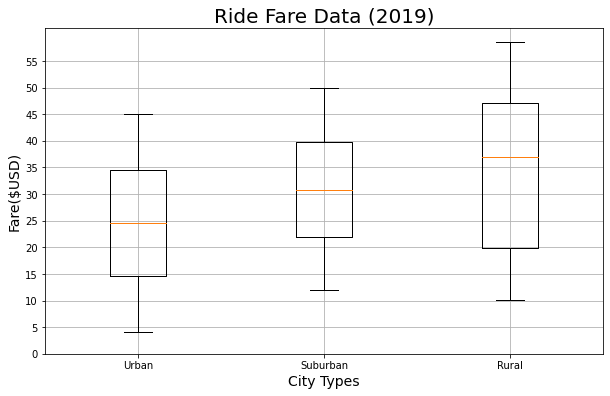

In [62]:
#Add all ride count box and whisker plots to the same graph
x_labels=["Urban", "Suburban", "Rural"]
fare_data=[urban_fares, suburban_fares, rural_fares]
fig, ax = plt.subplots(figsize=(10,6))
ax.set_title("Ride Fare Data (2019)", fontsize=20)
ax.set_ylabel("Fare($USD)", fontsize =14)
ax.set_xlabel("City Types", fontsize =14)
ax.boxplot(fare_data, labels=x_labels)
ax.set_yticks(np.arange(0, 60, step=5.0))
ax.grid()
#save the figure
plt.savefig("analysis/fig3.png")
plt.show()

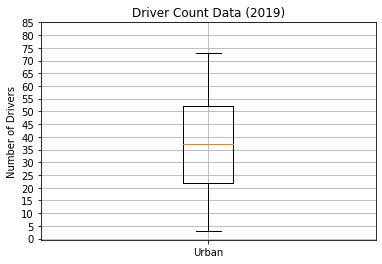

Summary Statistics


count    1625.000000
mean       36.678154
std        20.075545
min         3.000000
25%        22.000000
50%        37.000000
75%        52.000000
max        73.000000
Name: driver_count, dtype: float64

In [65]:
#Create the box and whisker plot for the urban driver count data
x_labels=["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_drivers, labels=x_labels)

#format
ax.set_title("Driver Count Data (2019)")
ax.set_ylabel("Number of Drivers")
ax.set_yticks(np.arange(0,90, step=5.0))
ax.grid()

plt.show()
print("Summary Statistics")
urban_drivers.describe()

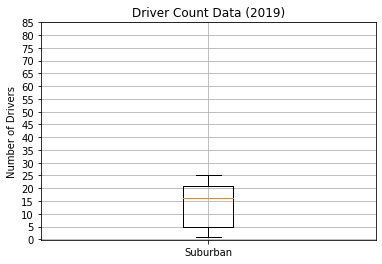

Summary Statistics


count    625.000000
mean      13.712000
std        8.042372
min        1.000000
25%        5.000000
50%       16.000000
75%       21.000000
max       25.000000
Name: driver_count, dtype: float64

In [66]:
#Create the box and whisker plot for the urban driver count data
x_labels=["Suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_drivers, labels=x_labels)

#format
ax.set_title("Driver Count Data (2019)")
ax.set_ylabel("Number of Drivers")
ax.set_yticks(np.arange(0,90, step=5.0))
ax.grid()

plt.show()
print("Summary Statistics")
suburban_drivers.describe()

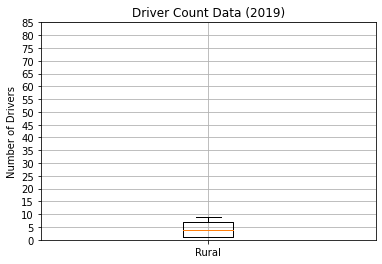

Summary Statistics


count    125.000000
mean       4.296000
std        2.691156
min        1.000000
25%        1.000000
50%        4.000000
75%        7.000000
max        9.000000
Name: driver_count, dtype: float64

In [67]:
#Create the box and whisker plot for the urban driver count data
x_labels=["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_drivers, labels=x_labels)

#format
ax.set_title("Driver Count Data (2019)")
ax.set_ylabel("Number of Drivers")
ax.set_yticks(np.arange(0,90, step=5.0))
ax.grid()

plt.show()
print("Summary Statistics")
rural_drivers.describe()

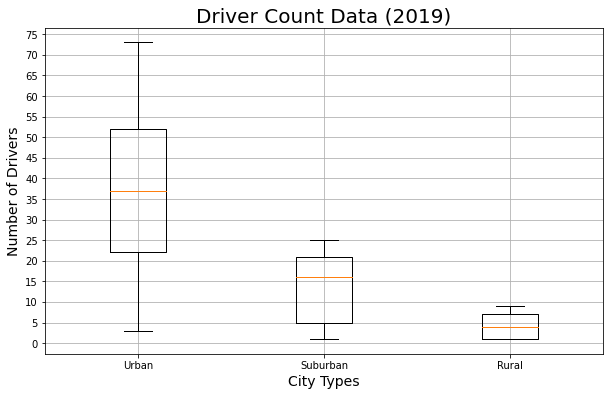

In [71]:
#create a box whisker plot for all three city types
x_labels=["Urban", "Suburban", "Rural"]
driver_data=[urban_drivers, suburban_drivers, rural_drivers]
fig, ax = plt.subplots(figsize=(10,6))
ax.boxplot(driver_data, labels=x_labels)

#format
ax.set_title("Driver Count Data (2019)", fontsize=20)
ax.set_ylabel("Number of Drivers", fontsize =14)
ax.set_xlabel("City Types", fontsize =14)
ax.set_yticks(np.arange(0, 80, step=5.0))
ax.grid()
#save the figure
plt.savefig("analysis/fig4.png")
plt.show()

In [72]:
#5.5 Creating pie charts
#get the sum of the fares for each city type
sum_fares_by_type= pyber_data_df.groupby(["type"]).sum()["fare"]
sum_fares_by_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [74]:
#get the sum of all the fares
total_fares = pyber_data_df["fare"].sum()
total_fares

63538.64

In [76]:
#calculate the percentage of fares for each city type
type_percents = 100*sum_fares_by_type/total_fares 
type_percents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

In [80]:
#calculate in one line
type_percents = 100* pyber_data_df.groupby(["type"]).sum()["fare"]/pyber_data_df["fare"].sum()
type_percents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

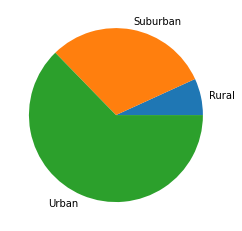

In [81]:
#build the percentage of fares by city type pie chart
plt.pie(type_percents, labels=["Rural", "Suburban", "Urban"])
plt.show

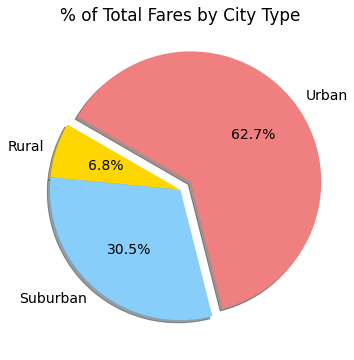

In [84]:
#import mpl to change the plot configurations usuing rcParams
import matplotlib as mpl

#build the percentage of fares by city type pie chart
plt.subplots(figsize=(10,6))
plt.pie(type_percents, 
       labels = ["Rural", "Suburban", "Urban"],
       colors = ["gold", "lightskyblue", "lightcoral"],
       explode=[0,0,0.1],
       autopct="%1.1f%%",
       shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")

#chg the default font size from 10 to 14
mpl.rcParams['font.size']= 14

#save figure
plt.savefig("analysis/Fig5.png")
#show figure
plt.show()
        

In [85]:
#calculate ride percentages per city type
ride_percents = 100*pyber_data_df.groupby(["type"]).count()["ride_id"]/pyber_data_df["ride_id"].count()
ride_percents

type
Rural        5.263158
Suburban    26.315789
Urban       68.421053
Name: ride_id, dtype: float64

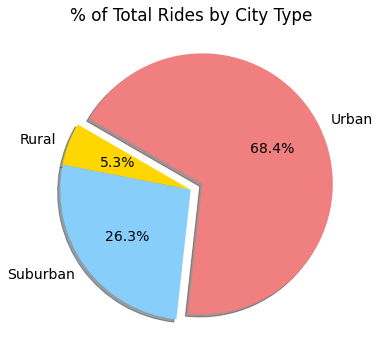

In [86]:
#build the percentage of rides by city type pie chart
plt.subplots(figsize=(10,6))
plt.pie(ride_percents, 
       labels = ["Rural", "Suburban", "Urban"],
       colors = ["gold", "lightskyblue", "lightcoral"],
       explode=[0,0,0.1],
       autopct="%1.1f%%",
       shadow=True, startangle=150)
plt.title("% of Total Rides by City Type")

#chg the default font size from 10 to 14
mpl.rcParams['font.size']= 14

#save figure
plt.savefig("analysis/Fig6.png")
#show figure
plt.show()